### Introduction

Here I'm testing code from the A2C algorithm. I'm following the code from 

https://github.com/germain-hug/Deep-RL-Keras/blob/master/A2C/

Note: I haven't implemented the temporal difference part yet. So, this is really just policy gradient with
a baseline state-value function (which I model with another, separate, neural net -- do other people do this? I must check).

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, 21.0)
(episode, score) = (100, 13.0)
(episode, score) = (150, 43.0)
(episode, score) = (200, 23.0)
(episode, score) = (250, 53.0)
(episode, score) = (300, 117.0)
(episode, score) = (350, 200.0)
(episode, score) = (400, 186.0)
(episode, score) = (450, 200.0)
(episode, score) = (500, 200.0)


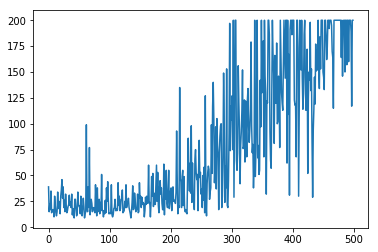

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent_with_baseline import Agent
from keras.utils import to_categorical
%matplotlib inline


EPISODES = 500

env = gym.make('CartPole-v0')
env.seed(1)  #for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
lr, gamma = 0.001, 0.99
agent = Agent(num_states, num_actions,lr,gamma)
scores = []

for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward)
        state = next_state
    agent.train_models()
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
np.savetxt('stats/scores_cartpole.txt',scores)

Note: most training wasn't this good

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent_with_baseline import Agent
from keras.utils import to_categorical
%matplotlib inline


EPISODES = 2000

env = gym.make('CartPole-v0')
env.seed(1)  #for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
lr, gamma = 0.001, 0.99
agent = Agent(num_states, num_actions,lr,gamma)
scores = []

for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward)
        state = next_state
    agent.train_models()
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
#np.savetxt('stats/scores_cartpole.txt',scores)

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, 14.0)
(episode, score) = (100, 12.0)
(episode, score) = (150, 20.0)
(episode, score) = (200, 13.0)
(episode, score) = (250, 56.0)
(episode, score) = (300, 65.0)
(episode, score) = (350, 37.0)
(episode, score) = (400, 14.0)
(episode, score) = (450, 124.0)
(episode, score) = (500, 115.0)
(episode, score) = (550, 111.0)
(episode, score) = (600, 119.0)
(episode, score) = (650, 200.0)
(episode, score) = (700, 200.0)
(episode, score) = (750, 200.0)
(episode, score) = (800, 189.0)
(episode, score) = (850, 155.0)
(episode, score) = (900, 200.0)
(episode, score) = (950, 156.0)
(episode, score) = (1000, 125.0)
(episode, score) = (1050, 130.0)
(episode, score) = (1100, 200.0)
(episode, score) = (1150, 200.0)
(episode, score) = (1200, 200.0)
(episode, score) = (1250, 200.0)
(episode, score) = (1300, 200.0)


KeyboardInterrupt: 

In [13]:
#Compute inputs for the optimizers
discounted_return = agent.find_discounted_return(agent.rewards)
values = agent.critic.model.predict(np.array(agent.states))
values.resize(len(values))
advantages = discounted_return - values
advantages

array([ 1.30237359,  1.29779103,  1.28087653,  1.27910881,  1.26193777,
        1.26047385,  1.24211722,  1.24054553,  1.22485073,  1.21318384,
        1.22265191,  1.1918707 ,  1.18049315,  1.18330751,  1.1583984 ,
        1.15186464,  1.13573578,  1.13130341,  1.11288749,  1.12140991,
        1.10480984,  1.09831883,  1.07069278,  1.07573891,  1.0601528 ,
        1.03972221,  1.03498531,  1.02693523,  1.00359594,  1.00012628,
        0.97891602,  0.98052688,  0.9545482 ,  0.95121523,  0.92966903,
        0.93222697,  0.904619  ,  0.90629339,  0.87909738,  0.87963872,
        0.85309561,  0.85283229,  0.84059438,  0.8245768 ,  0.79953349,
        0.7962526 ,  0.77212195,  0.76969167,  0.74476999,  0.74020617,
        0.72852913,  0.71061385,  0.69889754,  0.68146351,  0.66915866,
        0.65200636,  0.63628397,  0.62160182,  0.60487967,  0.59056039,
        0.56531692,  0.55759532,  0.54124189,  0.52581474,  0.50792062,
        0.49231486,  0.47358602,  0.45670839,  0.4343067 ,  0.41